# Assignment \#5

## Working with Data in Python

**Due:** 21st April 2016

This exercise is aimed at developing familiarity with the two primary `pandas` objects. 

* `pd.Series(data, index=index ...)`
* `pd.DataFrame(data, columns=columns, index=index ...)`


In [1]:
#Run this Cell#
%matplotlib inline
import pandas as pd

### Question \#1: Pandas Series

A series is a one-dimensional array-like object containing an array of data and an associated array of data labels (called an `index`). 

* (a) Run the following code and explore the pandas series object
* (b) Answer the questions that are in the cells below marked by `[Q]`


In [2]:
s1 = pd.Series([4,7,-5,3])
s2 = pd.Series([4,7,-5,3], index=['a','b','c','d'])

In [3]:
print(s1)

0    4
1    7
2   -5
3    3
dtype: int64


In [4]:
print(s2)

a    4
b    7
c   -5
d    3
dtype: int64


**[Q]:** What is the different between the `s1` object and the `s2` object

**Answer:** The `s1` object uses a default index scheme of increasing integers as no index was supplied when initially construcing the ``pd.Series`` object. The `s2` object uses an index that was provided which had the same length as the data. 

In [5]:
#-Sorting by Value-#
s1.sort_values()

2   -5
3    3
0    4
1    7
dtype: int64

In [6]:
print(s1)

0    4
1    7
2   -5
3    3
dtype: int64


**[Q]** Using the above example - please explain how the sort_values() method behaves.

The ``sort_values()`` method sorts the Series according to the values column. Due to automatic alignment this will reorder the index values which represent their initial ordering when the object was created. Based on the example above, this method however returns a new object, rather than mutating the underlying Pandas Series as when s1 is printed it prints the initial Series object. To save the result we would either reassign to the same or a new variable or alternatively use the ``inplace=True`` method argument. 

**[Q]** How would you save the object that is sorted by `values`?

In [7]:
#-Save in New Variable-#
s1b = s1.sort_values()
print(s1b)

2   -5
3    3
0    4
1    7
dtype: int64


In [8]:
#-Save using the method argument to mutate underlying pd.Series-#
s1.sort_values(inplace=True)
print(s1)

2   -5
3    3
0    4
1    7
dtype: int64


In [9]:
#-Restore the Pd.Series Object for next Problem-#
s1.sort_index(inplace=True)
print(s1)

0    4
1    7
2   -5
3    3
dtype: int64


**Plotting**

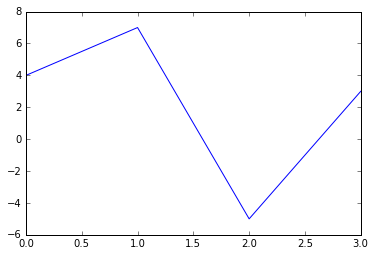

In [10]:
#-Plotting-#
s1.plot()

**[Q]** How would you plot the series that is sorted by values. [**Hint** Use the new sorted pandas series you saved above and pay particular attention to the index values.] Reconstruct the image shown below.

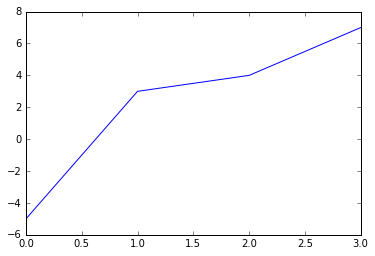

In [11]:
from IPython.display import Image
Image('./assignment5-question1-image1.png')

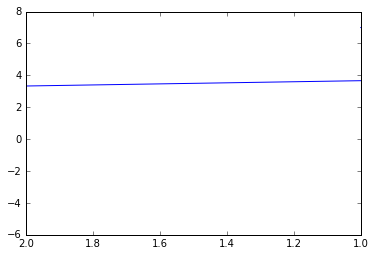

In [12]:
#-Try plotting s1b-#
s1b.plot()   #No looking good - What has happened?

In [13]:
#-Replace the Index as the Index values form the x-axis-#
s1b.index = range(0,4,1)

In [14]:
print(s1b)

0   -5
1    3
2    4
3    7
dtype: int64


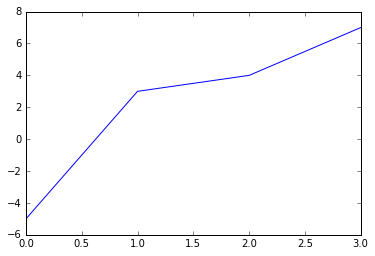

In [15]:
s1b.plot()

**Alternative Strategy using methods**

In [16]:
s1b = s1.sort_values()   #-Restore to s1b
s1b.name = "data"
print(s1b)

2   -5
3    3
0    4
1    7
Name: data, dtype: int64


In [17]:
df = s1b.reset_index()   #Using a method that resets the index

In [18]:
print(df["data"])

0   -5
1    3
2    4
3    7
Name: data, dtype: int64


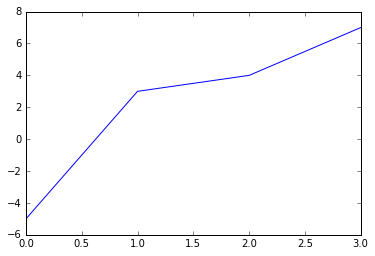

In [19]:
df["data"].plot()

**[Q]** Explore the Series Object. Work with **two** methods below that you find interesting. 

In [20]:
#-Sum over a Pandas Series-#
print(s1.sum())
print(sum(s1))

import numpy as np
print(np.sum(s1))

9
9
9


In [21]:
np.random.randn(5)

array([-1.53900294,  0.32885387, -1.10590214,  0.75905222,  1.07406142])

In [22]:
#-Label Based Alignment-#
print("S2 is:")
print(s2)
s3 = pd.Series(np.random.rand(2), index=['a','e'])
print("S3 is:")
print(s3)

S2 is:
a    4
b    7
c   -5
d    3
dtype: int64
S3 is:
a    0.305871
e    0.228421
dtype: float64


In [23]:
s2 + s3   #a is the only overlapping index value

a    4.305871
b         NaN
c         NaN
d         NaN
e         NaN
dtype: float64

In [24]:
#-Append one series onto another-#
s4 = s2.append(s3)
print(s4)

a    4.000000
b    7.000000
c   -5.000000
d    3.000000
a    0.305871
e    0.228421
dtype: float64


In [25]:
s4.index.is_unique

False

In [26]:
#-Groupby matching Index Items and Sum them Together-#
s4.groupby(level=0).sum()

a    4.305871
b    7.000000
c   -5.000000
d    3.000000
e    0.228421
dtype: float64

========================================================================

### Qustion \#2: Pandas DataFrame

**DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects.

**Different Representations of Data**

In [27]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)

In [28]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


**[Q]** Explain how the `dict()` object **d** is being interpreted by Pandas when constructing the dataframe. 

**Answer** The dictionary object is being interpreted as key-value pairs. In this way each ``pd.Series`` is treated as a column that is indexed by the key of each item respectively. Because the two series labeled by `one` and `two` respectively are of different length. The resultant index is a union of both objects. 

-----------------------------------------------------------------------------------------------------------------------

**[Q]** How else might you represent the original data to construct the same dataframe using only ``lists`` rather than a ``dict`` of ``pd.Series``.

In [29]:
data = [[1., 2., 3.],[1., 2., 3., 4.]]
idx = ['a', 'b', 'c', 'd']
names = ['one','two']

In [30]:
df = pd.DataFrame(data, index=names, columns=idx)

In [31]:
df

,a,b,c,d
one,1.0,2.0,3.0,NaN
two,1.0,2.0,3.0,4.0


In [32]:
df = df.T

In [33]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [34]:
#-Alternatively-#
data = [[1.,1.], [2., 2.], [3.,3.],[np.nan,4.]]
idx = ['a', 'b', 'c', 'd']
names = ['one','two']

In [35]:
df = pd.DataFrame(data, index=idx, columns=names)  #Note: the use of index and columns in the DataFrame object

In [36]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


----------------------------------------------------------------------------------------------------------------------

#### Indexing and Values

**[Q]** Using a fresh copy of `df` as is defined below. How would you change the value from `2` to `100` in the column that is indexed by `two`?. Do **not** change the original data -- manipulate the dataframe object

The resulting DataFrame should look like

||one|two|
|-|---|---|
|a|	1 |	1 |
|b|	2 |	100|
|c|	3 |	3 |
|d|	NaN|4 |



In [37]:
#-Fresh Copy of df-#
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)

In [38]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [39]:
#-Use simple selection-#
df['two'].ix['b'] = 100

In [40]:
df

,one,two
a,1.0,1.0
b,2.0,100.0
c,3.0,3.0
d,NaN,4.0


In [41]:
#-Use Method (Note: Reset df object)-#
df.set_value(index="b", col="two", value=100)

,one,two
a,1.0,1.0
b,2.0,100.0
c,3.0,3.0
d,NaN,4.0


------------------------------------------------------------------------------------------------------------------------

#### Working with Data

Using the following GDP per person (in 1000's of US Dollars) from 2008 to 2014 from the IMF's *World Economic Outlook* database

In [42]:
import pandas as pd
data = {'BRA': [13.37, 13.30, 14.34, 15.07, 15.46, 15.98, 16.10],
        'JPN': [33.43, 31.83, 33.71, 34.29, 35.60, 36.79, 37.39],
        'USA': [48.30, 46.91, 48.31, 49.72, 51.41, 52.94, 54.60],
        'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014]}
weo  = pd.DataFrame(data)

In [43]:
weo['Year']

0    2008
1    2009
2    2010
3    2011
4    2012
5    2013
6    2014
Name: Year, dtype: int64

**[Q]** How would you set the index of the dataframe object **weo** to be `Year`?

In [44]:
weo

,BRA,JPN,USA,Year
0,13.37,33.43,48.30,2008
1,13.30,31.83,46.91,2009
2,14.34,33.71,48.31,2010
3,15.07,34.29,49.72,2011
4,15.46,35.60,51.41,2012
5,15.98,36.79,52.94,2013
6,16.10,37.39,54.60,2014


In [45]:
weo = weo.set_index("Year")

In [46]:
weo

,BRA,JPN,USA
Year,,,
2008,13.37,33.43,48.30
2009,13.30,31.83,46.91
2010,14.34,33.71,48.31
2011,15.07,34.29,49.72
2012,15.46,35.60,51.41
2013,15.98,36.79,52.94
2014,16.10,37.39,54.60


**[Q]** How would you plot all three countries timeseries?

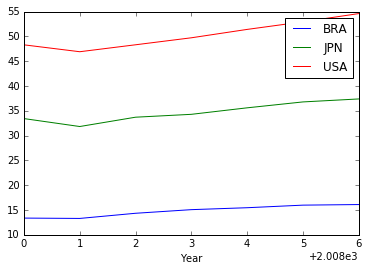

In [47]:
weo.plot()

**[Q]** How would you plot just the time series for the `USA`? [*Hint:* How do you select data in a dataframe]

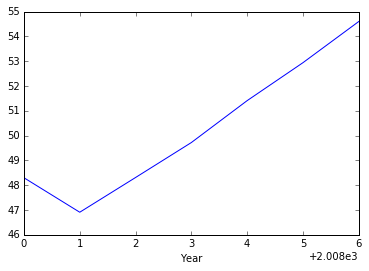

In [48]:
weo["USA"].plot()

**[Q] (Optional - Challenging)** How would you format the plot to show the full year values? (As shown in the image below)

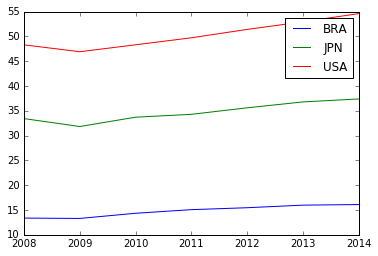

In [49]:
Image('./assignment5-question2-image1.png')

In [50]:
weo.index  #-Note the type of Index is int64 and the index is formating the numbers in the previous graphs in scientific notation-#

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014], dtype='int64', name='Year')

In [51]:
weo.index = weo.index.format(formatter=str)

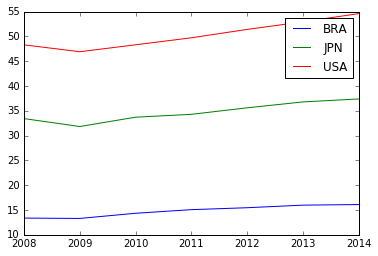

In [52]:
weo.plot()

-------------------------------------------------------------------------------------------------------------------------------------

#### Merging Data

In [53]:
df1 = pd.DataFrame([1., 2., 3.], index=['c', 'b', 'a'], columns=['one'])
df2 = pd.DataFrame([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'], columns=['two'])

In [54]:
df1

,one
c,1.0
b,2.0
a,3.0


In [55]:
df2

,two
a,1.0
b,2.0
c,3.0
d,4.0


Use the `merge` method to combine these two dataframes.

In [56]:
df = df1.merge(df2, left_index=True, right_index=True)

In [57]:
df

,one,two
a,3.0,1.0
b,2.0,2.0
c,1.0,3.0


**[Q]** Based on the results above. What do you notice about the default *merge* behaviour of Pandas DataFrames?

**Answer:** The default merge behaviour is to return the `inner` join of two objects. That is it is the intersection of the indices between each object. Therefore the returned dataframe will be of length 3 along `axis=0`. 

**[Q]** How would you alter the merge so that the resultant dataframe contained the full set of data that is defined in the `df2` object?

| |one|two|
|-|---|---|
|a|	3 |	1 |
|b|	2 |	2 |
|c|	1 |	3 |
|d|	NaN|4 |

In [58]:
df = df1.merge(df2, left_index=True, right_index=True, how="outer")

In [59]:
df

,one,two
a,3.0,1.0
b,2.0,2.0
c,1.0,3.0
d,NaN,4.0


=======================================================================

### Question \#3: World Development Indicators (WDI)

Let's download some WDI data for GDP per Capita (Constant 2005 US$)


In [60]:
from pandas_datareader import data, wb

**[Q]** Explain the above import statement

**Answer:** The above import statement asks Python to find the package called `pandas_datareader` and from that package import two objects called `data` and `wb`. We know these items are available due to the documentation for `pandas_datareader` http://pandas-datareader.readthedocs.io/en/latest/. 

wb stands for `World Bank` and is documented here: http://pandas-datareader.readthedocs.io/en/latest/remote_data.html#world-bank

Project documentation is very important when trying to find a potential library you would like to use. 

The package `pandas_datareader` needs to be installed on your system using `conda install pandas_datareader`

**Using the `wb` object**

In [61]:
#-Search for GDP per Capita Codes-#
wb.search('gdp.*capita.*const')[['id','name']].head()

,id,name
686,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation..."
7461,NY.GDP.PCAP.KD,GDP per capita (constant 2005 US$)
7463,NY.GDP.PCAP.KN,GDP per capita (constant LCU)
7465,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation..."


In [62]:
#-Download Data-#
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'FR', 'AU'],\
                  start=2005, end=2014)

** View the Data **

In [63]:
dat.head()

NY.GDP.PCAP.KD
country   year                
Australia 2014    37867.767415
          2013    37507.976426
          2012    37241.390414
          2011    36560.441167
          2010    36210.356759

In [64]:
dat.index.levels

FrozenList([['Australia', 'France', 'United States'], ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']])

In [65]:
dat.index.names

FrozenList(['country', 'year'])

**[Q]** What type of object is `dat`

**Answer:** `dat` is a Pandas DataFrame. The `wb` module has returned the data nicely formatted as a Pandas DataFrame. 

In [66]:
type(dat)

pandas.core.frame.DataFrame

**[Q]** What type of object is `dat['NY.GDP.PCAP.KD']`

In [67]:
dat['NY.GDP.PCAP.KD'].head()

country    year
Australia  2014    37867.767415
           2013    37507.976426
           2012    37241.390414
           2011    36560.441167
           2010    36210.356759
Name: NY.GDP.PCAP.KD, dtype: float64

In [68]:
type(dat['NY.GDP.PCAP.KD'])

pandas.core.series.Series

**Answer:** This is a Pandas Series Object. We have selected one column of a Pandas DataFrame

**[Q]** What type of object is `dat[['NY.GDP.PCAP.KD']]`

In [69]:
dat[['NY.GDP.PCAP.KD']].head()

NY.GDP.PCAP.KD
country   year                
Australia 2014    37867.767415
          2013    37507.976426
          2012    37241.390414
          2011    36560.441167
          2010    36210.356759

In [70]:
type(dat[['NY.GDP.PCAP.KD']])

pandas.core.frame.DataFrame

**Answer:** This is a Pandas DataFrame object. This is due to the use of `[[` in selection which is interpreted as asking for a collection or list of columns. Even though only one has been specified Pandas will return this selection as a single column DataFrame object

**[Q]** How would you compute the average GDP per capita over all years for each country? [*Hint* Use the `groupby` method]

In [71]:
dat.groupby(level="country").mean()

,NY.GDP.PCAP.KD
country,
Australia,36160.604062
France,35514.065784
United States,44823.868648


**[Q]** How can we reshape `dat` so that countries are listed as the columns [*Hint:* Might consider using `unstack`, or `pivot_table` methods]

In [72]:
dat.unstack(level="country")

NY.GDP.PCAP.KD                            
country      Australia        France United States
year                                              
2005      33982.950427  34879.726329  44307.920585
2006      34484.127368  35460.013387  45052.921254
2007      35557.110086  36073.518323  45420.187361
2008      36143.475676  35942.538142  44861.390895
2009      36050.444884  34706.326075  43235.558409
2010      36210.356759  35214.132081  43961.168477
2011      36560.441167  35772.881814  44324.944522
2012      37241.390414  35675.971111  45008.614113
2013      37507.976426  35754.651979  45660.733802
2014      37867.767415  35660.898603  46405.247065

**[Q]** How would you plot `Australia's` time series of GDP per Capita

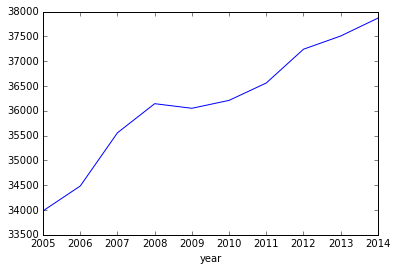

In [73]:
ndat = dat.unstack(level="country")
ndat[('NY.GDP.PCAP.KD','Australia')].plot()

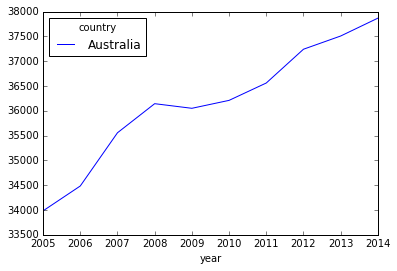

In [74]:
#-An Alternative-#
ndat = dat.unstack(level="country")
ndat.columns = ndat.columns.droplevel()
ndat[["Australia"]].plot()